# immo_eliza data analysis
I. Data cleaning
  1. Importing necessary libraries and Loading the dataset
  2. Explorint the dataset and renaming the headers
  3. Converting booleans to 1 and 0
  4. checking and removing duplication 
  5. cleaning in the "Price" column  
  6. cleaning  the total area column  
  7.  Removing columns with many NaN and have no significant impact
  8. cleaning bedroomCount column 
  9. cleaning province,region and locality column
  10. cleaning HasBalcony and HasGarden column
  11. categorizing data
   *  categroizing kitchen types   
   *  catgorizing construction year    

  
  12. Removing outliers 
  13. cleaning floor columns

II. Analyzing and visualizing the data
1. Questions
  * what is the average cost of house and apartment in Belgium?
  * What is the average cost of house and apartment in Ghent?
  * which (region,province,locality) is cheapest|expensive?
  * what is the correlation?
    * between price and bedroomcount
    * between price and facadecount
    * between price and floor
    * between price and constructionyear
  

In [11]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 17px;
</style>

## 1. Importing necessary Libraries and Loading the dataset

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\32467\OneDrive\Documents\Arai4_Projects\real-estate-price-prediction\assets\data_3.csv")

In [14]:
df['Sub type'].unique()

array(['HOUSE', 'MIXED_USE_BUILDING', 'APARTMENT', 'PENTHOUSE',
       'FLAT_STUDIO', 'CHALET', 'APARTMENT_BLOCK', 'COUNTRY_COTTAGE',
       'VILLA', 'TOWN_HOUSE', 'MANSION', 'DUPLEX', 'EXCEPTIONAL_PROPERTY',
       'GROUND_FLOOR', 'LOFT', 'MANOR_HOUSE', 'FARMHOUSE',
       'OTHER_PROPERTY', 'CASTLE', 'PAVILION', 'TRIPLEX', 'BUNGALOW',
       'SERVICE_FLAT', 'KOT'], dtype=object)

# 2. Exploring the dataset and renaming the headers

In [15]:
initial_size = df.shape
initial_size

(21047, 35)

In [16]:
df.head()


,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN


In [17]:
df.columns

Index(['ID', 'Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'locality', 'Region', 'PostCode', 'street',
       'Floor', 'RegionCode', 'IsIsolated', 'HasSeaView', 'SchoolDistance',
       'ShopDistance', 'TransportDistance', 'NetHabitableSurface',
       'TotalRoomCount', 'HasAttic', 'HasBasement', 'HasDiningRoom',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasBalcony',
       'HasGarden', 'GardenArea', 'KitchekType', 'LivingRoomArea'],
      dtype='object')

In [18]:
df.describe(include='all').T # Transpose the data frame so that it fits in a cell

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,21047.0,NaN,NaN,NaN,10148845.939184,11541.858189,10128188.0,10139022.5,10149580.0,10157350.5,10168916.0
Type,21047,2,HOUSE,11906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub type,21047,24,HOUSE,9227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,19434.0,NaN,NaN,NaN,396623.905166,403465.788486,1385.0,230000.0,315000.0,445000.0,29650000.0
NetHabitableSurface(msq),18086.0,NaN,NaN,NaN,160.455103,222.093157,11.0,93.0,130.0,186.0,17842.0
BedroomCount,20571.0,NaN,NaN,NaN,2.990229,13.456484,1.0,2.0,3.0,3.0,1919.0
Province,20264,11,Antwerp,4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
locality,21047,2616,Gent,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,20264,3,Flanders,12565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostCode,21047,1305,9000,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# renaming the header of the data
df = df.rename(columns={"KitchekType":"KitchenType","Sub type":"SubType","street":"Street","locality":"Locality"})

## 3. Converting booleans to 1 and 0

In [20]:
# convert boolean false and True to o and 1
df.replace({False: 0, True: 1}, inplace=True)
df.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,1.0,NaN,1.0,589.0,NaN,NaN


## 4.  check and remove  duplication 


In [21]:
# check if the ID column is unique
df['ID'].is_unique


False

In [22]:
# finding the deplicated rows(with same ID Number)
from os import dup
duplicateRows = df[df.duplicated('ID')]
print(duplicateRows.shape)
duplicateRows.head()

(1379, 35)


,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
12602,10151467,APARTMENT,APARTMENT,235000.0,90.0,2.0,Antwerp,Mortsel,Flanders,2640,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
12603,10151468,HOUSE,HOUSE,320000.0,161.0,2.0,West Flanders,Oostkamp,Flanders,8020,...,NaN,NaN,NON_FLOOD_ZONE,GAS,NaN,NaN,NaN,NaN,NaN,NaN
12604,10151472,HOUSE,HOUSE,184000.0,181.0,2.0,Limburg,Genk,Flanders,3600,...,NaN,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,1.0,NaN,NaN,NaN
12605,10151474,HOUSE,HOUSE,200000.0,130.0,3.0,Antwerp,Westerlo,Flanders,2260,...,NaN,NaN,NON_FLOOD_ZONE,GAS,1.0,NaN,1.0,NaN,NaN,NaN
12606,10151476,HOUSE,HOUSE,482000.0,151.0,3.0,Flemish Brabant,Dilbeek,Flanders,1700,...,NaN,NaN,NON_FLOOD_ZONE,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [23]:
df = df.drop_duplicates()

In [24]:
size_after_removing_duplicates = df.shape
removed_duplicates = initial_size[0] - size_after_removing_duplicates[0]
print(f'{removed_duplicates} rows are duplicates and removed')
print(size_after_removing_duplicates)


1379 rows are duplicates and removed
(19668, 35)


In [25]:
df["ID"].describe()

count    1.966800e+04
mean     1.014858e+07
std      1.189163e+04
min      1.012819e+07
25%      1.013843e+07
50%      1.014825e+07
75%      1.015789e+07
max      1.016892e+07
Name: ID, dtype: float64

In [26]:
# Replace empty cells of the "Price" column by NaN
df['Price'].replace('', np.nan, inplace=True)
df.head()

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchenType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,1.0,NaN,1.0,589.0,NaN,NaN


## 5. cleaning in the "Price" column 

In [27]:
# drop the rows for those with empty price
df.dropna(subset=['Price'], inplace=True)
df.shape

(18211, 35)

In [28]:
print(f'{size_after_removing_duplicates[0]-df.shape[0]} of {initial_size[0]}  data collected has no price' )
print(f' Now we have data for {df.shape[0]}  proprties in Belgium ')

1457 of 21047  data collected has no price
 Now we have data for 18211  proprties in Belgium 


In [29]:
# to be deleted
df["HasBalcony"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: HasBalcony, dtype: float64

In [30]:
df.describe()

,ID,Price,NetHabitableSurface(msq),BedroomCount,Floor,HasSeaView,SchoolDistance,ShopDistance,TransportDistance,NetHabitableSurface,...,HasBasement,HasDiningRoom,ConstructionYear,FacadeCount,HasLift,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,LivingRoomArea
count,1.821100e+04,1.821100e+04,15550.000000,17810.000000,5277.000000,12.0,14458.000000,14458.000000,14458.000000,15550.000000,...,7254.0,3099.0,10277.000000,12258.000000,4326.0,11814.0,0.0,5935.0,3520.000000,5811.000000
mean,1.014851e+07,3.958509e+05,163.420900,3.050646,3.149896,1.0,107.950339,100.495020,26.413266,163.420900,...,1.0,1.0,1981.681425,2.777125,1.0,1.0,NaN,1.0,641.649716,14.961452
std,1.194431e+04,4.070204e+05,193.691889,14.453556,19.777805,0.0,368.895605,602.382276,123.721231,193.691889,...,0.0,0.0,88.244062,0.866607,0.0,0.0,NaN,0.0,3047.464076,43.223104
min,1.012819e+07,1.385000e+03,11.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,11.000000,...,1.0,1.0,1753.000000,1.000000,1.0,1.0,NaN,1.0,1.000000,1.000000
25%,1.013834e+07,2.300000e+05,94.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,94.000000,...,1.0,1.0,1960.000000,2.000000,1.0,1.0,NaN,1.0,60.000000,9.000000
50%,1.014813e+07,3.150000e+05,134.000000,3.000000,2.000000,1.0,0.000000,0.000000,0.000000,134.000000,...,1.0,1.0,1983.000000,3.000000,1.0,1.0,NaN,1.0,160.000000,12.000000
75%,1.015795e+07,4.438875e+05,190.750000,3.000000,3.000000,1.0,0.000000,0.000000,0.000000,190.750000,...,1.0,1.0,2020.000000,4.000000,1.0,1.0,NaN,1.0,500.000000,16.000000
max,1.016892e+07,2.965000e+07,17842.000000,1919.000000,999.000000,1.0,9000.000000,15000.000000,3700.000000,17842.000000,...,1.0,1.0,9999.000000,8.000000,1.0,1.0,NaN,1.0,87000.000000,2153.000000


In [31]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,18211.0,NaN,NaN,NaN,10148510.587832,11944.308767,10128188.0,10138337.5,10148134.0,10157954.5,10168916.0
Type,18211,2,HOUSE,10818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubType,18211,24,HOUSE,8344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,18211.0,NaN,NaN,NaN,395850.930811,407020.425225,1385.0,230000.0,315000.0,443887.5,29650000.0
NetHabitableSurface(msq),15550.0,NaN,NaN,NaN,163.4209,193.691889,11.0,94.0,134.0,190.75,17842.0
BedroomCount,17810.0,NaN,NaN,NaN,3.050646,14.453556,1.0,2.0,3.0,3.0,1919.0
Province,17514,11,Antwerp,3295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locality,18211,2609,Gent,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,17514,3,Flanders,10980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostCode,18211,1304,9000,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. cleaning NetHabitableSurface(msq)  column

In [32]:
df.dropna(subset=['NetHabitableSurface(msq)'], inplace=True)


In [33]:
df.shape

(15550, 35)

## 7.  Removing columns with many NaN and have no significant impact

In [34]:
# check the nan values again
df.isna().sum()

ID                              0
Type                            0
SubType                         0
Price                           0
NetHabitableSurface(msq)        0
BedroomCount                  301
Province                      673
Locality                        0
Region                        673
PostCode                        0
Street                       3476
Floor                       10586
RegionCode                    673
IsIsolated                  10717
HasSeaView                  15540
SchoolDistance               3436
ShopDistance                 3436
TransportDistance            3436
NetHabitableSurface             0
TotalRoomCount              14420
HasAttic                    13601
HasBasement                  9149
HasDiningRoom               12987
BuildingCondition            4840
ConstructionYear             6331
FacadeCount                  4909
HasLift                     11479
FloodZoneType                7071
HeatingType                  5389
IsDoubleGlaze 

In [35]:
df = df.drop(['NetHabitableSurface','HasSeaView', 'SchoolDistance',\
       'ShopDistance', 'TransportDistance','TotalRoomCount', 'HasAttic','IsIsolated',\
       'HasBasement', 'HasDiningRoom', 'HasLift','FloodZoneType', 'HeatingType', 'IsDoubleGlaze',\
       'LivingRoomArea', 'GardenArea','Street'], axis=1)

In [36]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'Locality', 'Region', 'PostCode', 'Floor',
       'RegionCode', 'BuildingCondition', 'ConstructionYear', 'FacadeCount',
       'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

## 8. cleaning bedroomCount column 

In [37]:
# first check the number of NaN value
df['BedroomCount'].isna().sum()

301

In [38]:
df['BedroomCount'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
21041    False
21042    False
21043    False
21044    False
21046    False
Name: BedroomCount, Length: 15550, dtype: bool

In [40]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21035, 21036, 21038, 21039, 21040, 21041, 21042, 21043, 21044,
            21046],
           dtype='int64', length=15550)

In [41]:
bedroom_count_mean = {"APARTMENT":2.0,"DUPLEX": 2.0,"FLAT_STUDIO": 1.0,"GROUND_FLOOR" :2,"KOT":1.0,"LOFT": 3.0,
"PENTHOUSE": 3,"SERVICE_FLAT": 1, "PENTHOUSE": 3.0,"SERVICE_FLAT":1.0,"TRIPLEX":3.0,"APARTMENT_BLOCK":7.0,
    "BUNGALOW":3.0,"CASTLE": 9.0, "CHALET ":3.0,"COUNTRY_COTTAGE":6,"EXCEPTIONAL_PROPERTY":5,"FARMHOUSE":5,
           "MANOR_HOUSE":6,"MANSION":5,"MIXED_USE_BUILDING":5.0,'OTHER_PROPERTY':7.0,'TOWN_HOUSE':3.0,"VILLA":3.0}
           
           

In [45]:
df.dropna(subset=['BedroomCount'], inplace=True)
df.shape

(15249, 18)

In [46]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'Locality', 'Region', 'PostCode', 'Floor',
       'RegionCode', 'BuildingCondition', 'ConstructionYear', 'FacadeCount',
       'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

## 9. cleaning province,region and locality 


Belgium is made up of three regions, each having considerable autonomy. The Walloon Region is the largest, followed by Flemish Region. The Brussels Capital Region is the smallest.

In [47]:
df["PostCode"].isna().sum()

0

In [48]:

print("number of rows with nan values for Region: ",df['Region'].isna().sum())
print("number of rows with nan values for Province: ",df['Province'].isna().sum())
print("number of rows with nan values for Locality: ",df['Locality'].isna().sum())
print('number of rows with nan values for postcode: ',df['PostCode'].isna().sum())

number of rows with nan values for Region:  647
number of rows with nan values for Province:  647
number of rows with nan values for Locality:  0
number of rows with nan values for postcode:  0


In [49]:

print('Regions in Belgium: ',df['Region'].unique())
print("Provinces in Belgium: ",df["Province"].unique())
print("Locality in Belgium: ",df["Locality"].unique())


Regions in Belgium:  ['Flanders' 'Wallonie' 'Brussels' nan]
Provinces in Belgium:  ['Limburg' 'Antwerp' 'Liège' 'Brussels' 'East Flanders' 'Namur' nan
 'Flemish Brabant' 'Hainaut' 'West Flanders' 'Walloon Brabant'
 'Luxembourg']
Locality in Belgium:  ['Zonhoven' 'Berlaar' 'Merksplas' ... 'Erpe' 'Gijzelbrechtegem' 'Beerst']


In [50]:
df.dropna(subset=['Region','Province'], inplace=True)

## 10. HasBalcony and HasGarden 
for HasBalcony& HasGarden convert boolean(T/F) -----> 0/1


In [51]:
df.HasBalcony = df.HasBalcony.replace({True: 1, False: 0})
df.HasGarden = df.HasGarden.replace({True:1,False:0})

In [52]:
df[['HasBalcony', 'HasGarden']] = df[['HasBalcony', 'HasGarden']].fillna(0) 

In [53]:
df["HasGarden"].value_counts()

0.0    9540
1.0    5062
Name: HasGarden, dtype: int64

## 11. categorizing data  

categroizing kitchen types   ### 11.1        

In [54]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'Locality', 'Region', 'PostCode', 'Floor',
       'RegionCode', 'BuildingCondition', 'ConstructionYear', 'FacadeCount',
       'HasBalcony', 'HasGarden', 'KitchenType'],
      dtype='object')

In [55]:
df['KitchenType'].value_counts()



INSTALLED             4829
HYPER_EQUIPPED        1942
SEMI_EQUIPPED         1227
USA_HYPER_EQUIPPED     894
NOT_INSTALLED          549
USA_INSTALLED          338
USA_SEMI_EQUIPPED       77
USA_UNINSTALLED          5
Name: KitchenType, dtype: int64

maping values to  labels
NOT_INSTALLED  --- 0
USA_UNINSTALLE --- 0
INSTALLED -------- 1
USA_INSTALLED ---- 1
SEMI_EQUIPPED ---- 2
USA_SEMI_EQUIPPED  2             
HYPER_EQUIPPED     3  
missed value ----- 0

In [56]:
df['KitchenType'].isnull()


0         True
1         True
2         True
3         True
4         True
         ...  
21041    False
21042    False
21043     True
21044    False
21046     True
Name: KitchenType, Length: 14602, dtype: bool

In [57]:
df.loc[df['KitchenType'] == "NOT_INSTALLED", 'KitchenType'] = 0
df.loc[df['KitchenType'] == "USA_UNINSTALLED", 'KitchenType'] = 0
df.loc[df['KitchenType'] == "INSTALLED", 'KitchenType'] = 1
df.loc[df['KitchenType'] == "USA_INSTALLED", 'KitchenType'] = 1
df.loc[df['KitchenType'] == "SEMI_EQUIPPED", 'KitchenType'] = 2
df.loc[df['KitchenType'] == "USA_SEMI_EQUIPPED", 'KitchenType'] = 2
df.loc[df['KitchenType'] == "HYPER_EQUIPPED", 'KitchenType'] = 3
df.loc[df['KitchenType'] == "USA_HYPER_EQUIPPED", 'KitchenType'] = 3
df.loc[df['KitchenType'].isna(), 'KitchenType'] = 0

In [58]:
df['KitchenType'].value_counts()

0    5295
1    5167
3    2836
2    1304
Name: KitchenType, dtype: int64

### 11.2  catgorizing construction year    
catgorizing data for construction year
house built: before 2000 --> old = 0,after 2000 --> new = 1,  missing is --> old = 0


In [59]:


df['Status'] = np.where(df['ConstructionYear']>= 2010, 1, 0)



In [60]:
df['ConstructionYear'].value_counts()

2022.0    1150
2021.0     426
2023.0     421
1930.0     201
1970.0     174
          ... 
1832.0       1
1824.0       1
1852.0       1
1916.0       1
1775.0       1
Name: ConstructionYear, Length: 170, dtype: int64

## 12 Removing outliers 
1. checking  and removing outlier for price
2. checking and removing outlier for bedroomCount
3. checking and removing outlier for facadecount

1. checking  and removing outlier for price

In [61]:
df["Price"].describe()

count    1.460200e+04
mean     4.030106e+05
std      3.356672e+05
min      1.385000e+03
25%      2.450000e+05
50%      3.250000e+05
75%      4.490000e+05
max      8.100000e+06
Name: Price, dtype: float64

In [62]:
df = df[df['Price'] > 50000]
df.shape

(14575, 19)

In [63]:
df['Price'].describe()

count    1.457500e+04
mean     4.036870e+05
std      3.356091e+05
min      5.500000e+04
25%      2.450000e+05
50%      3.250000e+05
75%      4.490000e+05
max      8.100000e+06
Name: Price, dtype: float64

In [64]:
import seaborn as sns
from scipy import stats

<AxesSubplot:title={'center':'price scatter diagram'}, xlabel='ID', ylabel='Price'>

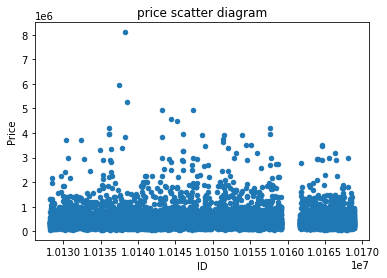

In [65]:
df.plot.scatter(x='ID', y='Price', title= 'price scatter diagram')

<AxesSubplot:xlabel='Price'>

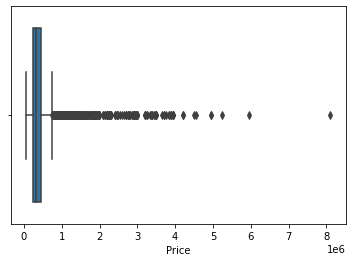

In [66]:
# checking outliers for price
sns.boxplot(x=df['Price'])


# Standard deviation
Standard deviation is the measure of how far a data point lies from the mean value. Generally, it is common practice to use 3 standard deviations for the detection and removal of outliers.

In [67]:
upper_limit = 0
lower_limit = 0
print('#########Starting ############')
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit


def call_outlier_removal(upper_limit,lower_limit,variable,df):
    print(f" ***** removing outlier for {variable} column  ****")
    upper_limit, lower_limit = outlier_removal(df, variable)


    
    i_upper_limit = upper_limit
    i_lower_limit = lower_limit
    print('i_upper_limit',upper_limit)
    print('i_lower_limit: ',lower_limit)
    
    
    while(True):
        df = df[(df[variable]> lower_limit)& (df[variable]<upper_limit)]
        upper_limit,lower_limit = outlier_removal(df,variable)
        if (upper_limit - i_upper_limit)== 0 and (lower_limit - i_lower_limit)==0:
            df = df[(df[variable]> lower_limit)& (df[variable]<upper_limit)]
            print("#upper_limit: ",upper_limit)
            print("#lower_limit: ",lower_limit)
            break
        i_lower_limit = lower_limit
        i_upper_limit = upper_limit
    return df


#########Starting ############


In [68]:
df.shape

(14575, 19)

In [69]:
df =call_outlier_removal(upper_limit,lower_limit,'Price',df)

 ***** removing outlier for Price column  ****
i_upper_limit 1410514.2005288454
i_lower_limit:  -603140.2404602349
#upper_limit:  758973.0372702662
#lower_limit:  -85455.04214939685


In [70]:
df.shape

(13527, 19)

<AxesSubplot:xlabel='Price'>

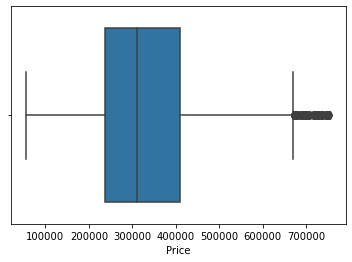

In [71]:
sns.boxplot(x=df['Price'])

In [72]:
df["Price"].describe()

count     13527.000000
mean     336758.997560
std      140738.013237
min       55000.000000
25%      237000.000000
50%      310000.000000
75%      410000.000000
max      755717.000000
Name: Price, dtype: float64

# InterQuartile Range:
interquartile range is a difference between the third quartile(Q3) and the first quartile(Q1). In this method, anything lying above  Q3 + 1.5 * IQR and Q1 – 1.5 * IQR  is considered an outlier.

<!-- def outliers(df, feature):
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower) -->

2. checking and removing outlier for bedroomCount

In [73]:
df['BedroomCount'].describe()

count    13527.000000
mean         2.758335
std          1.184920
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: BedroomCount, dtype: float64

<AxesSubplot:title={'center':'bedroomcount scatter diagram'}, xlabel='ID', ylabel='BedroomCount'>

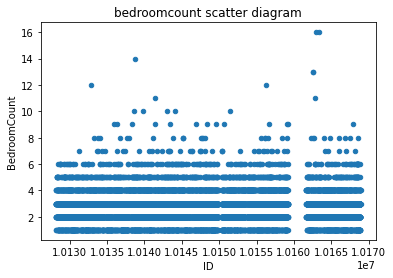

In [74]:
df.plot.scatter(x='ID', y='BedroomCount', title= 'bedroomcount scatter diagram')

<AxesSubplot:xlabel='BedroomCount'>

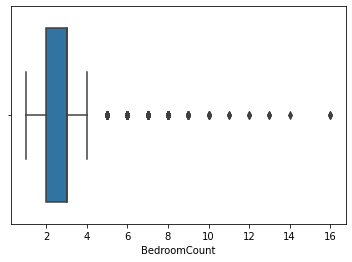

In [75]:
sns.boxplot(x=df['BedroomCount'])

In [76]:
df = call_outlier_removal(upper_limit,lower_limit,'BedroomCount',df)

 ***** removing outlier for BedroomCount column  ****
i_upper_limit 6.313096566755123
i_lower_limit:  -0.7964262037773753
#upper_limit:  5.671571994150904
#lower_limit:  -0.34212284160853157


In [77]:

df["BedroomCount"].describe()

count    13216.000000
mean         2.664725
std          1.002282
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: BedroomCount, dtype: float64

<AxesSubplot:xlabel='BedroomCount'>

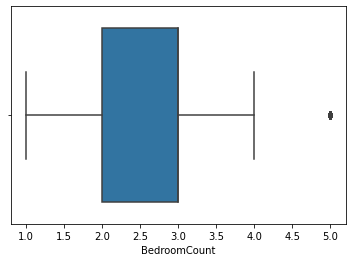

In [78]:
sns.boxplot(x=df['BedroomCount'])


3. checking and removing outlier for facadecount

In [79]:
df.shape

(13216, 19)

In [80]:
print('null value sum: ', df["FacadeCount"].isna().sum())
print(df["FacadeCount"].describe())
print(df["FacadeCount"].value_counts())



null value sum:  3910
count    9306.000000
mean        2.739630
std         0.832322
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: FacadeCount, dtype: float64
2.0    4570
3.0    2419
4.0    2257
1.0      58
6.0       2
Name: FacadeCount, dtype: int64


In [81]:
# normally  a house has atleast....and clients stress out if their property has more. so if they have more than one 
# they tend to mention ---------> facacdcount = 0 for NaN
df['FacadeCount'] = df['FacadeCount'].fillna(1)



<AxesSubplot:title={'center':'FacadeCount scatter diagram'}, xlabel='ID', ylabel='FacadeCount'>

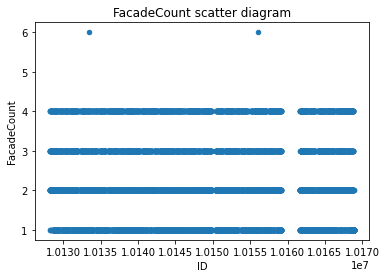

In [82]:
df.plot.scatter(x='ID', y='FacadeCount', title= 'FacadeCount scatter diagram')

<AxesSubplot:xlabel='FacadeCount'>

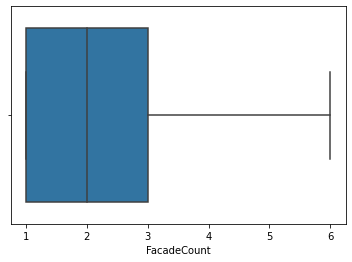

In [83]:
sns.boxplot(x=df['FacadeCount'])

In [84]:
df = call_outlier_removal(upper_limit,lower_limit,'FacadeCount',df)

 ***** removing outlier for FacadeCount column  ****
i_upper_limit 5.397432368954523
i_lower_limit:  -0.9475231679860006
#upper_limit:  5.39403962711739
#lower_limit:  -0.9452731673020427


<AxesSubplot:xlabel='FacadeCount'>

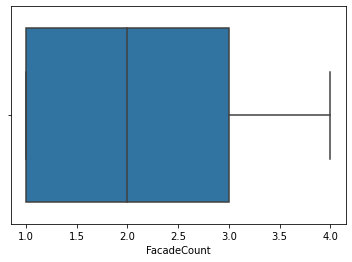

In [85]:
sns.boxplot(x=df['FacadeCount'])

In [86]:
df["FacadeCount"].unique()

array([3., 4., 2., 1.])

## 4 removing outliers for NetHabitableSurface(msq)

In [87]:
df['NetHabitableSurface(msq)'].describe()


count    13214.000000
mean       145.126457
std        175.072929
min         12.000000
25%         93.000000
50%        128.000000
75%        175.000000
max      17842.000000
Name: NetHabitableSurface(msq), dtype: float64

<AxesSubplot:xlabel='NetHabitableSurface(msq)'>

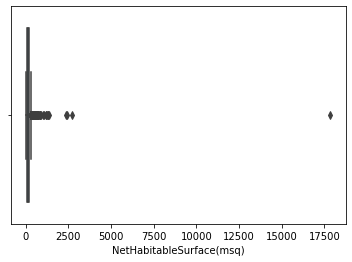

In [88]:
sns.boxplot(x=df['NetHabitableSurface(msq)'])

In [89]:
df = call_outlier_removal(upper_limit,lower_limit,'NetHabitableSurface(msq)',df)

 ***** removing outlier for NetHabitableSurface(msq) column  ****
i_upper_limit 670.3452441828813
i_lower_limit:  -380.0923306063715
#upper_limit:  301.74710043718926
#lower_limit:  -31.080902044931435


<AxesSubplot:xlabel='NetHabitableSurface(msq)'>

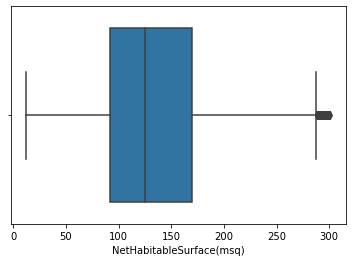

In [90]:
sns.boxplot(x=df['NetHabitableSurface(msq)'])

## 13. Cleaning floor columns

1. first check the unique floor numbers for apartment and house type of sales
  *  for house types the floor number should be all NaN
  *  for apartment it should be small positive integer
2. replace the NaN values of Floor number for the Apartment type of sales by mean value

In [91]:

print("unique values of floor number for type APARTMENT : ",df['Floor'].where(df['Type']== "APARTMENT").median())
print("unique values of floor number for type house: ",df['Floor'].where(df['Type']== "HOUSE").unique())
apartment_floor_median = df['Floor'].where(df['Type']== "APARTMENT").median()
print("median of  floor for apartments: ",apartment_floor_median)

unique values of floor number for type APARTMENT :  2.0
unique values of floor number for type house:  [nan]
median of  floor for apartments:  2.0


In [92]:
df["Floor"] = df['Floor'].where(df['Type']== "APARTMENT").fillna(apartment_floor_median)

# b. Data analysis and visualization

# 1. Questions
  * what is the average cost of house and apartment in Belgium?
  * What is the average cost of house and apartment in Ghent?
  * which (region,province,locality) is cheapest|expensive?
  * what is the correlation?
    * between price and bedroomcount
    * between price and facadecount
    * between price and floor
    * between price and constructionyear
  

What is the average cost of house and apartment in Belgium?

In [93]:
print("The average cost of House in Belgium is : ",int(df["Price"].where(df["Type"] == "HOUSE").mean()))
print("The average cost of Apartment in Belgium is: ",int(df["Price"].where(df["Type"]== "APARTMENT").mean()))

The average cost of House in Belgium is :  343939
The average cost of Apartment in Belgium is:  309541


What is the average cost of house and apartment in Ghent?

In [94]:
print("The average cost of Apartment in Ghent is : ",\
     df["Price"].where((df["Locality"] == "Gent")&(df["Type"] == "APARTMENT")).mean())
print("The average cost of House in Ghent is : ",\
     df["Price"].where((df["Locality"] == "Gent")&(df["Type"] == "HOUSE")).mean())

The average cost of Apartment in Ghent is :  366185.0
The average cost of House in Ghent is :  400301.06382978725


scatter diagram of the properties


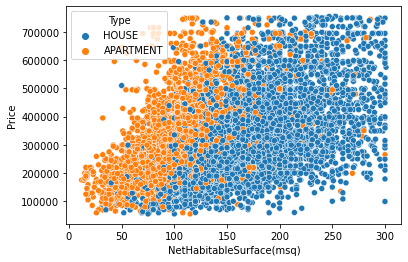

In [95]:


sns.scatterplot(data=df, x='NetHabitableSurface(msq)', y='Price', hue='Type')
plt.show()

Which province is cheapest|expensive?

In [96]:
df_apartment_groupedby_province = df.groupby(['Province','Type'])['Price'].mean().unstack()
df_apartment_groupedby_province.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

type(df_apartment_groupedby_province)

pandas.core.frame.DataFrame

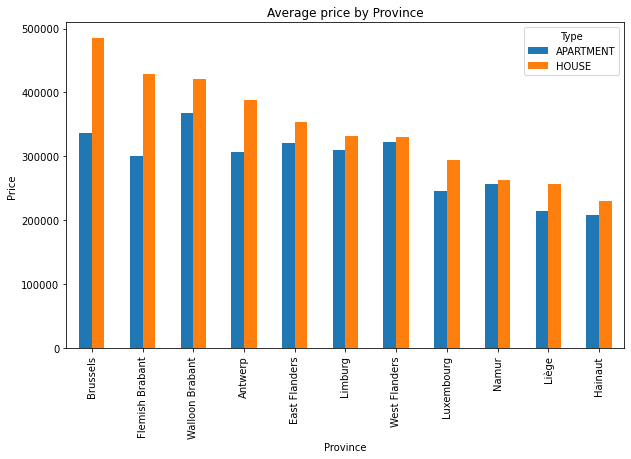

In [97]:
ax= df_apartment_groupedby_province.plot(kind='bar', title='Average price by Province',
               ylabel='Price', xlabel='Province', figsize=(10, 6))

ax.yaxis.set_units("Euro")

In which region it is more affordable to buy a house?

<AxesSubplot:title={'center':'Average price by Region'}, xlabel='Region', ylabel='Price in Euro'>

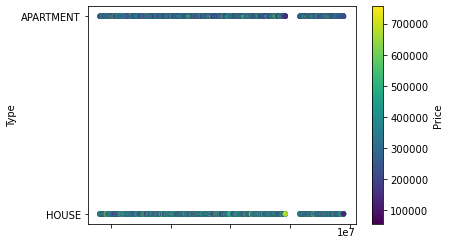

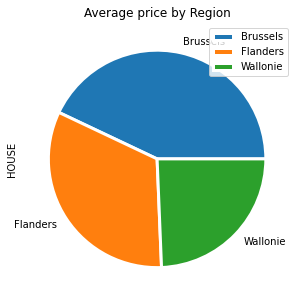

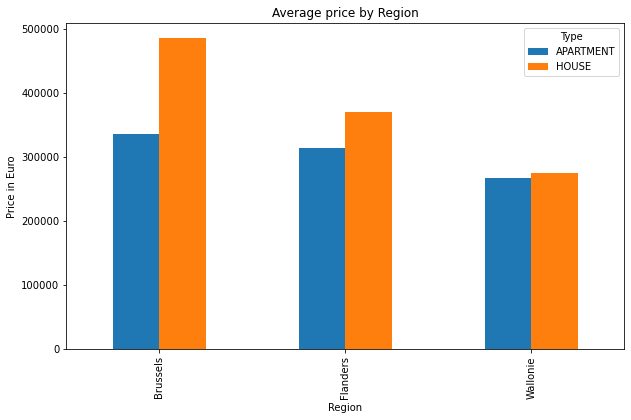

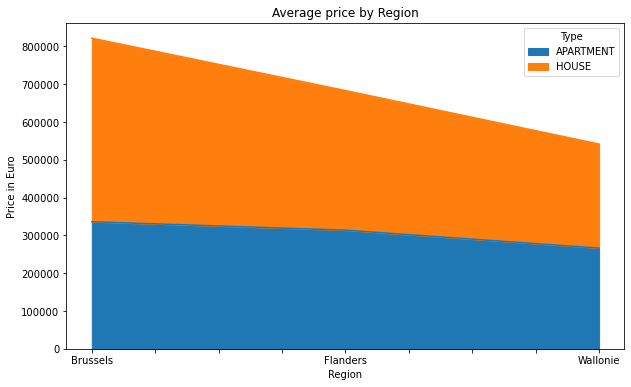

In [98]:
df.plot.scatter(x='ID',
                      y='Type',
                      c='Price',
                      colormap='viridis')
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind = 'pie', y= "HOUSE",figsize = (5,5), title='Average price by Region',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind='bar', title='Average price by Region',
               ylabel='Price in Euro', xlabel='Region', figsize=(10, 6))
df.groupby(['Region','Type'])['Price'].mean().unstack().plot(kind='area', title='Average price by Region',
               ylabel='Price in Euro', xlabel='Region', figsize=(10, 6))


In which locality in East flanders province, is the price for apartment|house the highest?

In [99]:
df.columns

Index(['ID', 'Type', 'SubType', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'Locality', 'Region', 'PostCode', 'Floor',
       'RegionCode', 'BuildingCondition', 'ConstructionYear', 'FacadeCount',
       'HasBalcony', 'HasGarden', 'KitchenType', 'Status'],
      dtype='object')

<AxesSubplot:title={'center':'Average price of East Flanders localities'}, xlabel='Locality', ylabel='Price in Euro'>

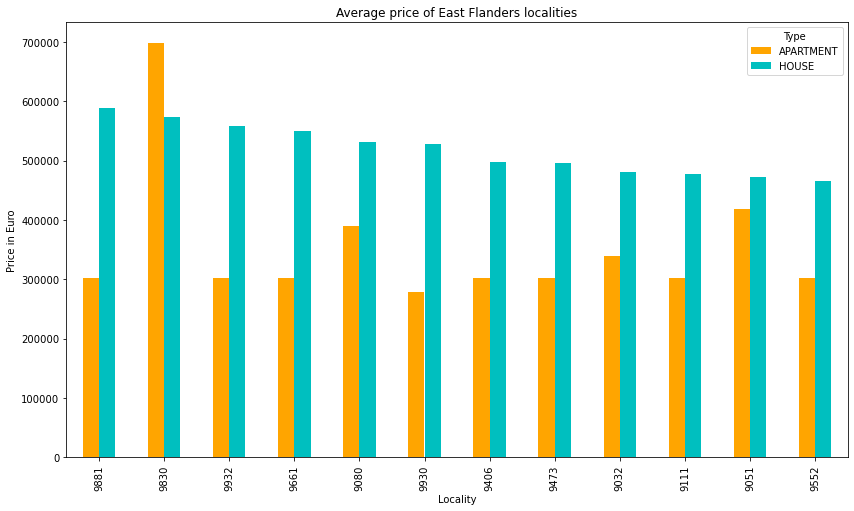

In [100]:
df1 = df.where(df['Province']=="East Flanders")

df2 = df1.groupby(['PostCode','Type'])['Price'].mean().unstack()

df2['APARTMENT'] = df2['APARTMENT'].fillna(int(df2['APARTMENT'].mean()))
df2['HOUSE'] = df2['HOUSE'].fillna(int(df2['HOUSE'].mean()))
df2.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

df2.head(12).plot(kind='bar',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average price of East Flanders localities',ylabel='Price in Euro', xlabel='Locality', figsize=(14, 8))

<AxesSubplot:title={'center':'Average price of Brussels localities'}, ylabel='Locality'>

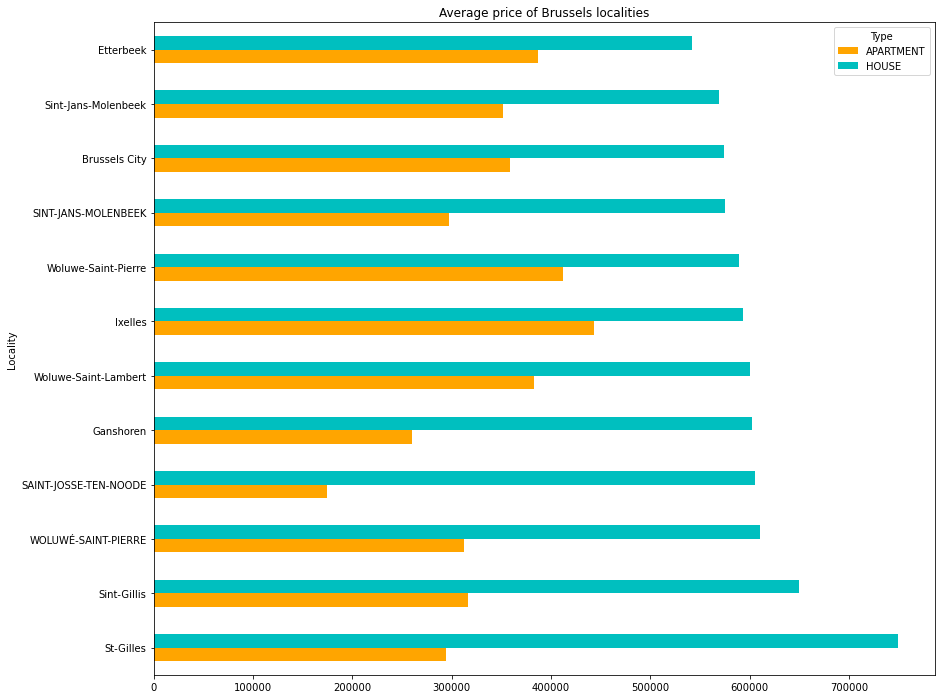

In [101]:
df1 = df.where(df['Province']=="Brussels")

df2 = df1.groupby(['Locality','Type'])['Price'].mean().unstack()

df2['APARTMENT'] = df2['APARTMENT'].fillna(int(df2['APARTMENT'].mean()))
df2['HOUSE'] = df2['HOUSE'].fillna(int(df2['HOUSE'].mean()))
df2.sort_values(by=['HOUSE','APARTMENT'], inplace=True, ascending=False)

df2.head(12).plot(kind='barh',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average price of Brussels localities',ylabel='Price in Euro', xlabel='Locality', figsize=(14, 12))

In [102]:
a= df[df['Province']== "Brussels"]
a.groupby('Locality')["Price"].value_counts()

Locality              Price   
ANDERLECHT            160000.0    1
                      185000.0    1
                      205000.0    1
                      220000.0    1
AUDERGHEM             390000.0    1
                                 ..
Woluwe-St-Pierre      445000.0    1
                      447500.0    1
Woluwe-saint-lambert  235000.0    1
                      375000.0    1
                      495000.0    1
Name: Price, Length: 1015, dtype: int64

In [103]:
df[df['Locality']=='Gand']

,ID,Type,SubType,Price,NetHabitableSurface(msq),BedroomCount,Province,Locality,Region,PostCode,Floor,RegionCode,BuildingCondition,ConstructionYear,FacadeCount,HasBalcony,HasGarden,KitchenType,Status
6873,10142453,HOUSE,HOUSE,595000.0,200.0,4.0,East Flanders,Gand,Flanders,9032,2.0,FLANDERS,AS_NEW,2012.0,3.0,0.0,1.0,3,1


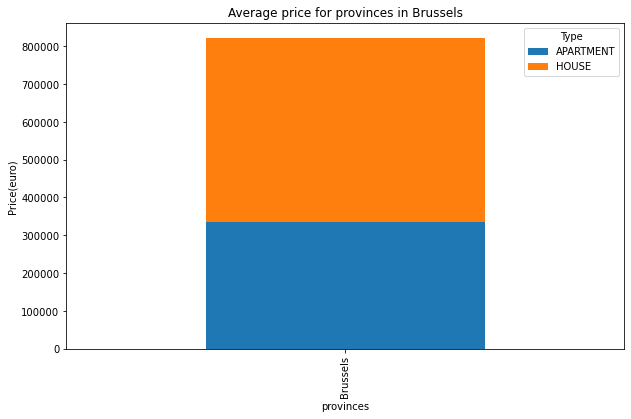

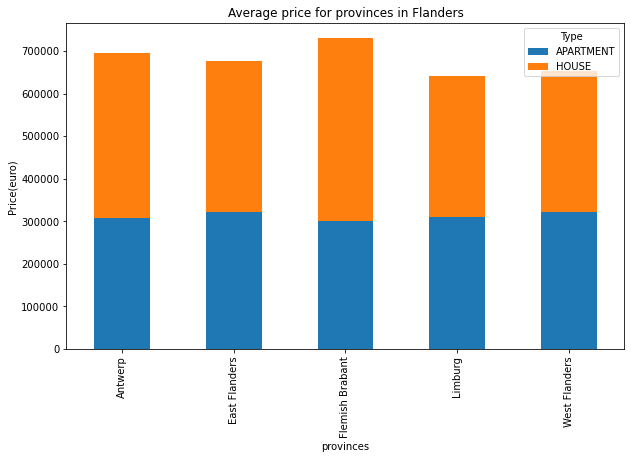

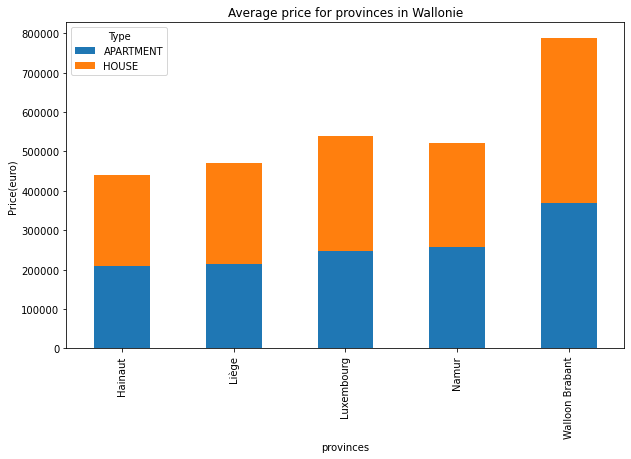

In [104]:

for region in df.groupby('Region').groups:
    df1 = df.where(df['Region']== region)
    df1.groupby(['Province','Type'])['Price'].mean().unstack().plot(kind='bar', title=f'Average price for provinces in {region}',
               ylabel='Price(euro)', xlabel='provinces', figsize=(10, 6),stacked =True)


How the number of bedrooms affect the price?


In [105]:
df["BedroomCount"].value_counts()

3.0    4557
2.0    4517
4.0    1793
1.0    1492
5.0     454
Name: BedroomCount, dtype: int64

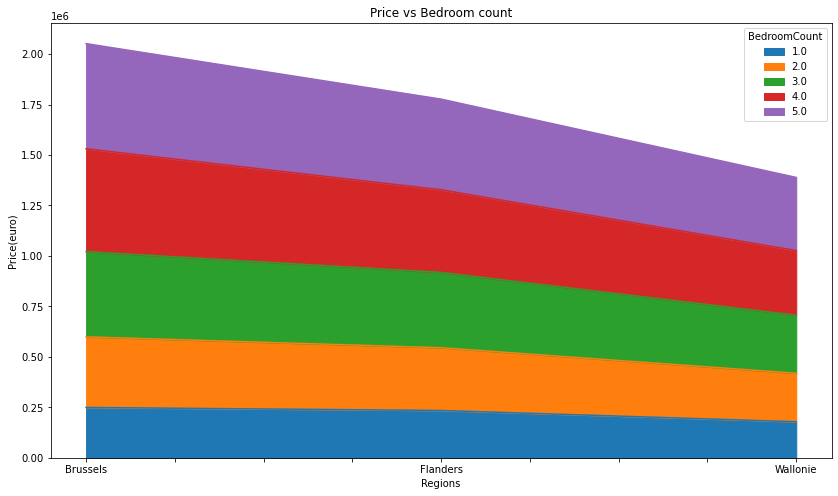

In [106]:

df_bedroom = df.groupby(['Region','BedroomCount'])['Price'].mean().unstack()
fig =df_bedroom.plot(kind='area', title=f'Price vs Bedroom count',
               ylabel='Price(euro)', xlabel='Regions', figsize=(14, 8),stacked =True)





How the floor number affect the price of an appartment?

<AxesSubplot:title={'center':'Average Price vs Age of Building'}, xlabel='Building status', ylabel='Price(euro)'>

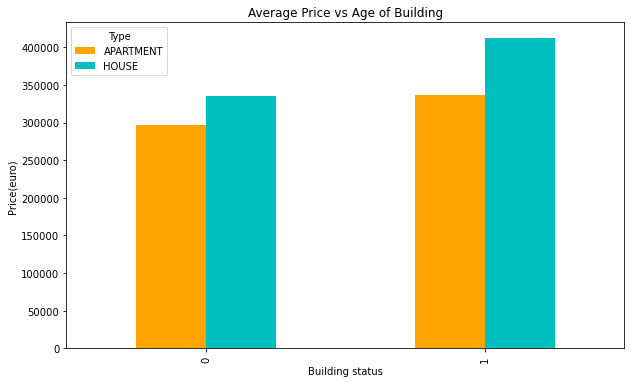

In [107]:



df.groupby(['Status','Type'])['Price'].mean().unstack().plot(kind='bar',color={"HOUSE": "c", "APARTMENT": "orange"},
title='Average Price vs Age of Building',ylabel='Price(euro)', xlabel='Building status', figsize=(10,6))


# Correlation
Correlation refers to the statistical relationship between two entities. In other words, it's how two variables move in relation to one another. Correlation can be used for various data sets, as well. In some cases, you might have predicted how things will correlate, while in others, the relationship will be a surprise to you. It's important to understand that correlation does not mean the relationship is causal.

To understand how correlation works, it's important to understand the following terms:
1. Positive correlation: A positive correlation would be 1. This means the two variables moved either up or down in the   same direction together.
2. Negative correlation: A negative correlation is -1. This means the two variables moved in opposite directions.
3. Zero or no correlation: A correlation of zero means there is no relationship between the two variables. In other words, as one variable moves one way, the other moved in another unrelated direction.

Types of Correlation

* Pearson correlation: The Pearson correlation is the most commonly used measurement for a linear relationship between two variables. The stronger the correlation between these two datasets, the closer it'll be to +1 or -1.
* Spearman correlation: This type of correlation is used to determine the monotonic relationship or association between two datasets. Unlike the Pearson correlation coefficient, it's based on the ranked values for each dataset and uses skewed or ordinal variables rather than normally distributed ones.
* Kendall correlation: This type of correlation measures the strength of dependence between two datasets.

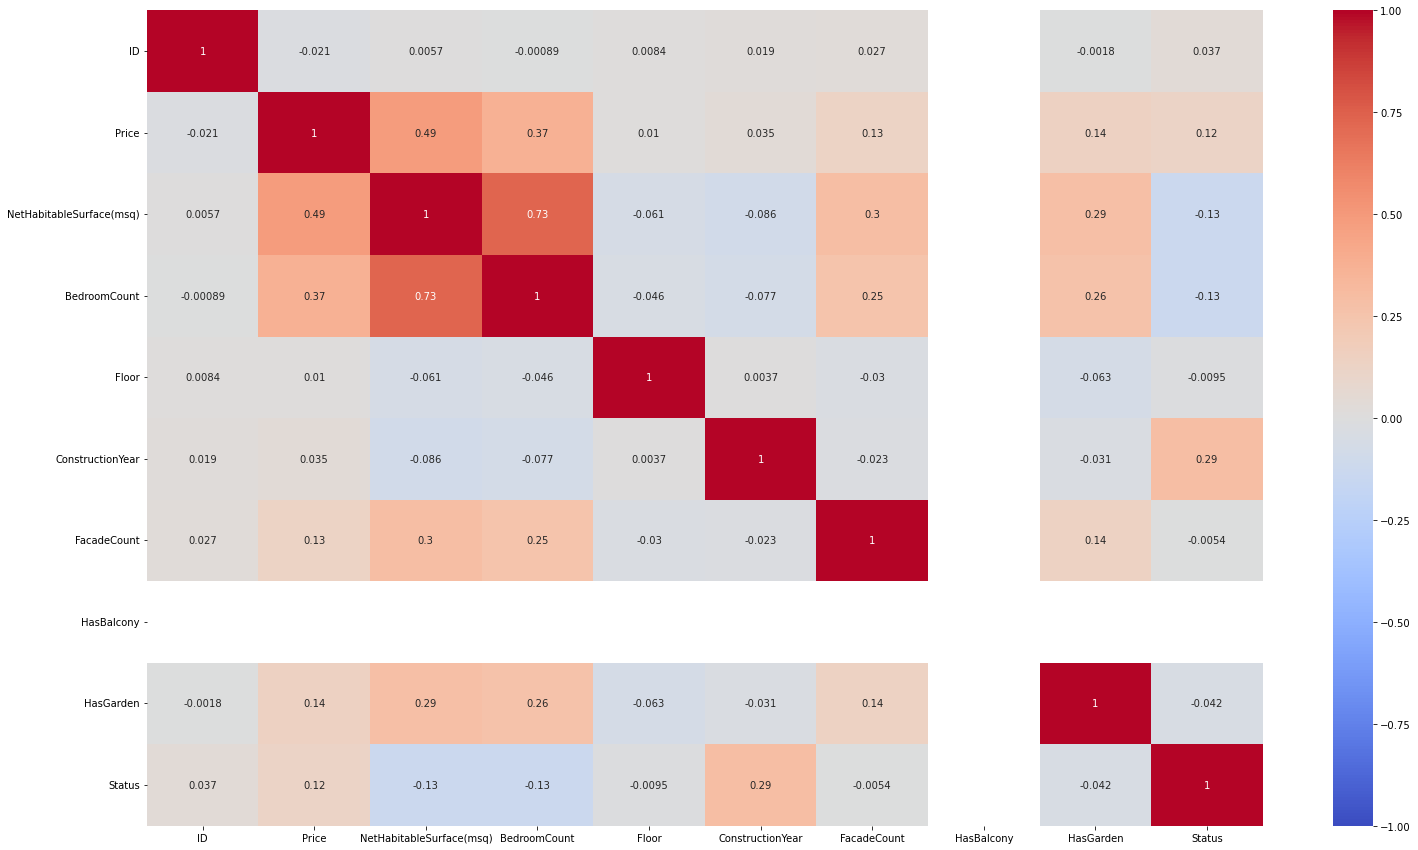

In [109]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [110]:
# correlation between price and bedroom  count
print("pearson:",df["Price"].corr(df["BedroomCount"], method="pearson"))
print("kendall:",df["Price"].corr(df["BedroomCount"], method="kendall"))
print("spearman:",df["Price"].corr(df["BedroomCount"], method="spearman"))


pearson: 0.3710915176160662
kendall: 0.29890344145362313
spearman: 0.38755681200555425


In [ ]:
df.to_csv(r"real-estate-price-prediction\assets\data.csv", header=True, index=False)